# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [2]:
data=pd.read_csv('Full-DataSet.csv',sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
# here target variable or dependent variable is feature "y"

In [4]:
data2=data.copy()

# **Exploratory Data Analysis**

In [5]:
data.shape

(41188, 21)

In [6]:
# checking missing values

(data.isna().sum())/len(data)*100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
housing,0.0
loan,0.0
contact,0.0
month,0.0
day_of_week,0.0


In [7]:
# checking duplicates

data.duplicated().sum()

12

In [8]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [9]:
# remove duplicated

data.drop_duplicates(inplace=True)

In [10]:
# checking datatypes

data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [11]:
# summary of data

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **verifying some features values**

In [14]:
data['job'].value_counts()

,count
job,
admin.,10419
blue-collar,9253
technician,6739
services,3967
management,2924
retired,1718
entrepreneur,1456
self-employed,1421
housemaid,1060


In [15]:
data['education'].value_counts()

,count
education,
university.degree,12164
high.school,9512
basic.9y,6045
professional.course,5240
basic.4y,4176
basic.6y,2291
unknown,1730
illiterate,18


In [16]:
data['contact'].value_counts()

,count
contact,
cellular,26135
telephone,15041


## **Pandas Profiling**

In [17]:
#! pip install ydata-profiling

In [18]:
# pandas profiling is use for over-all summary of data

#import ydata_profiling as pp
#eda_report = pp.ProfileReport(data)
#eda_report.to_file(output_file='EDA.report.html')

# **Visualization**

## **Distribution of numerical features**

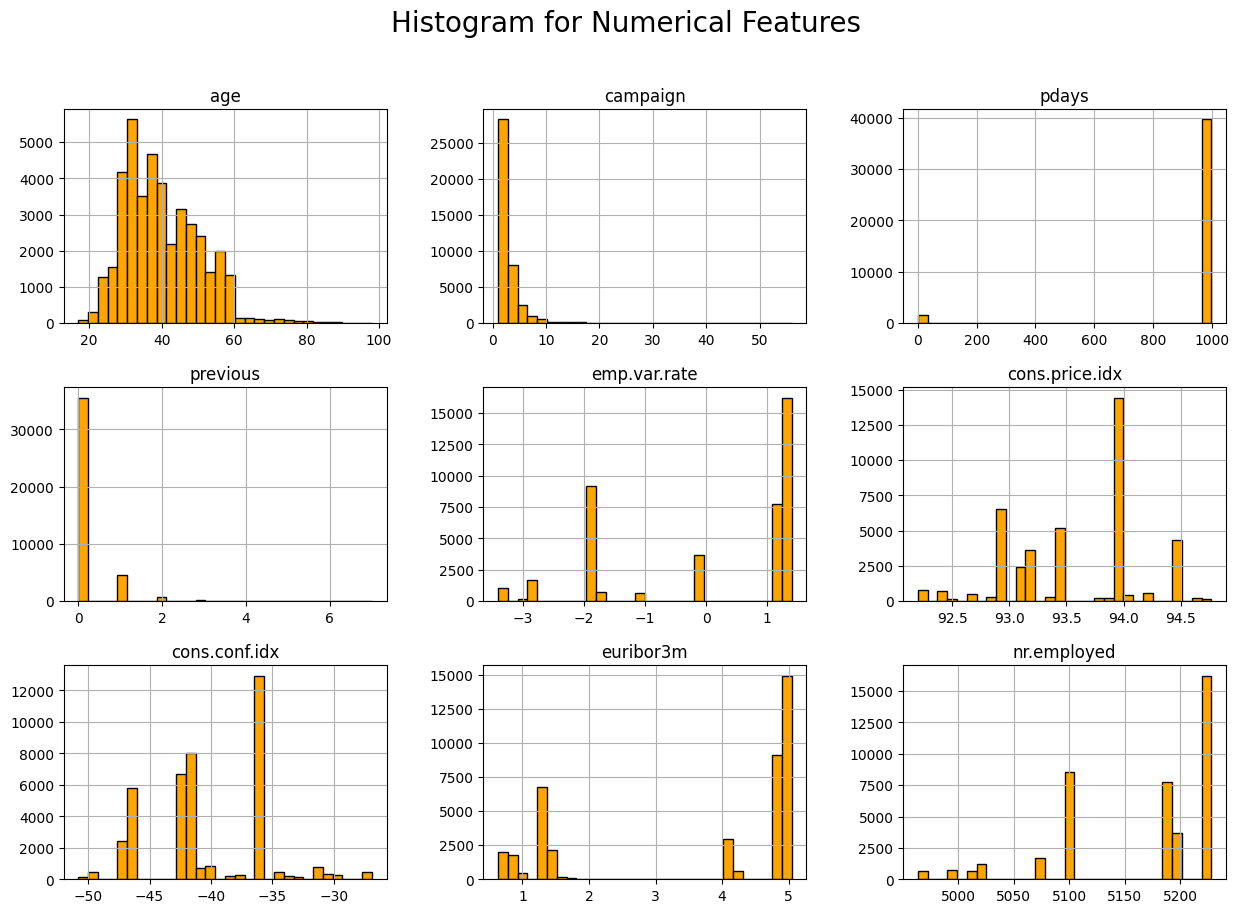

In [19]:
# Distribution of numerical features
# Histogram
numerical_features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data[numerical_features].hist(bins=30, figsize=(15, 10),color='orange',rwidth=1,edgecolor='black')
plt.suptitle('Histogram for Numerical Features',ha='center',fontsize=20)
plt.show()

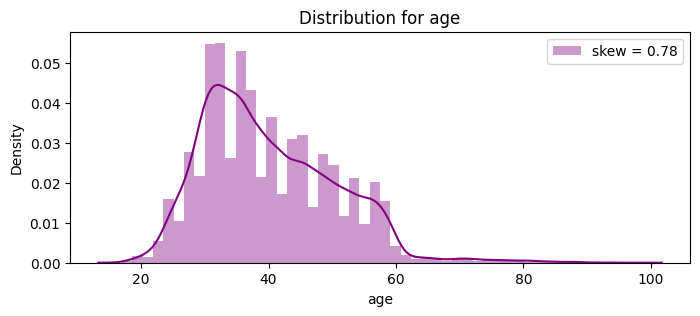

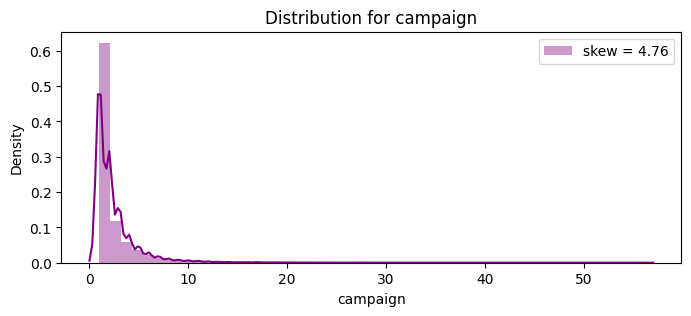

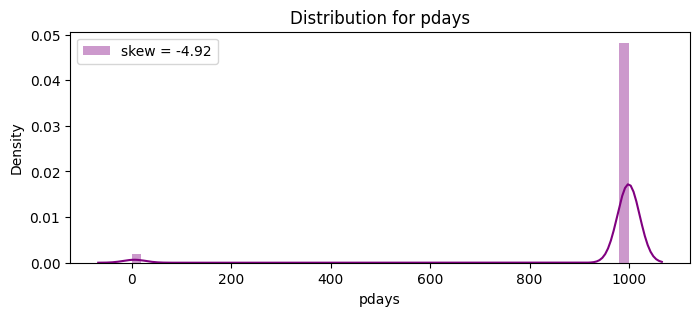

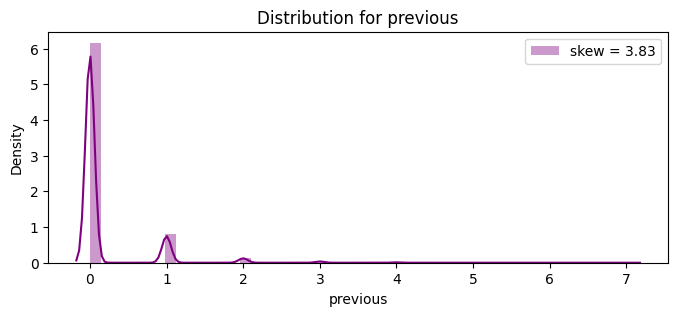

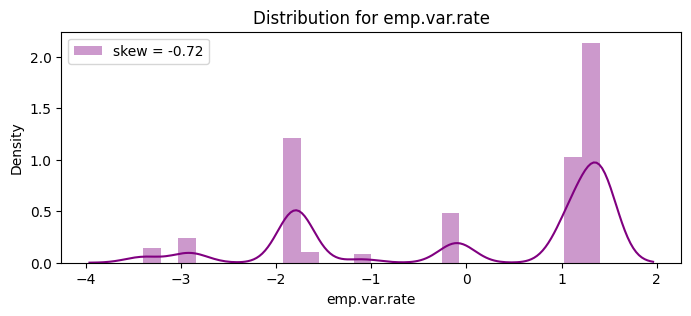

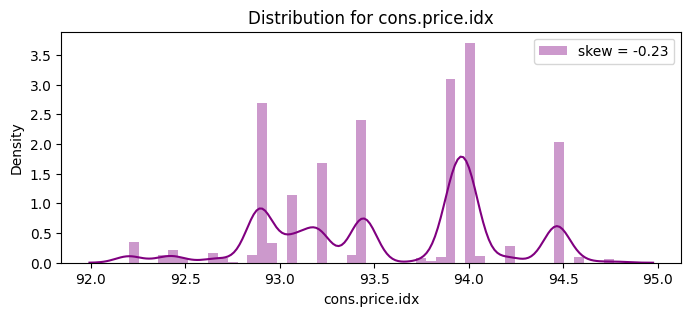

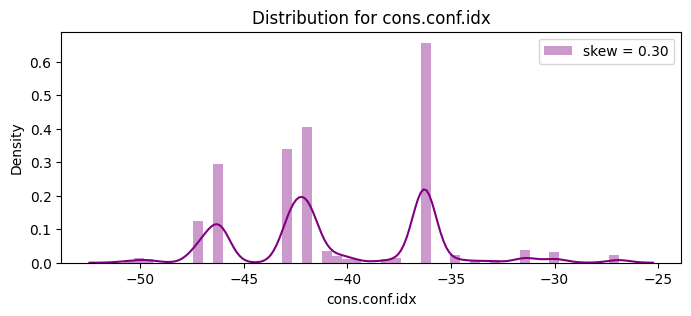

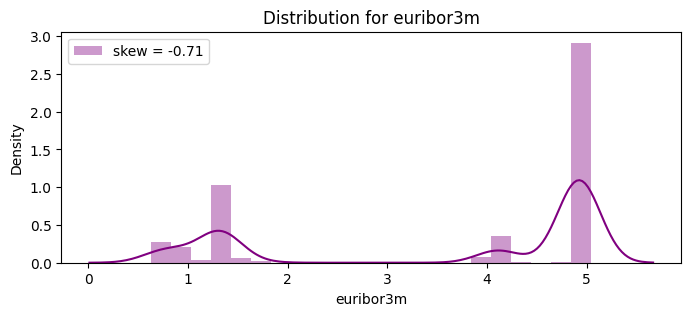

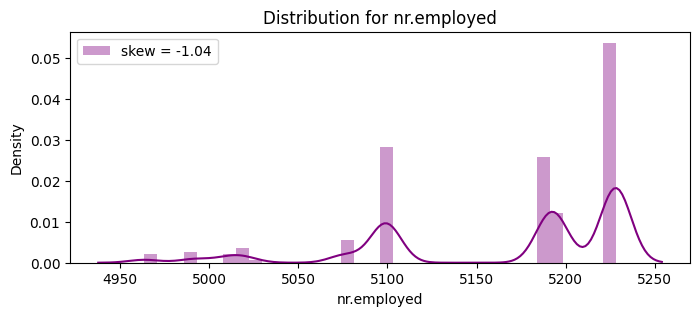

In [20]:
# Distplot

for col in numerical_features:
  plt.figure(figsize=(8,3))
  skew=data[col].skew()
  sns.distplot(data[col],label='skew = %.2f'%skew,color='purple')
  plt.title(f'Distribution for {col}')
  plt.legend()
  plt.show()

### **Correlation**

In [21]:
numerical_corr=data[numerical_features]
numerical_corr.corr()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
campaign,0.004622,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


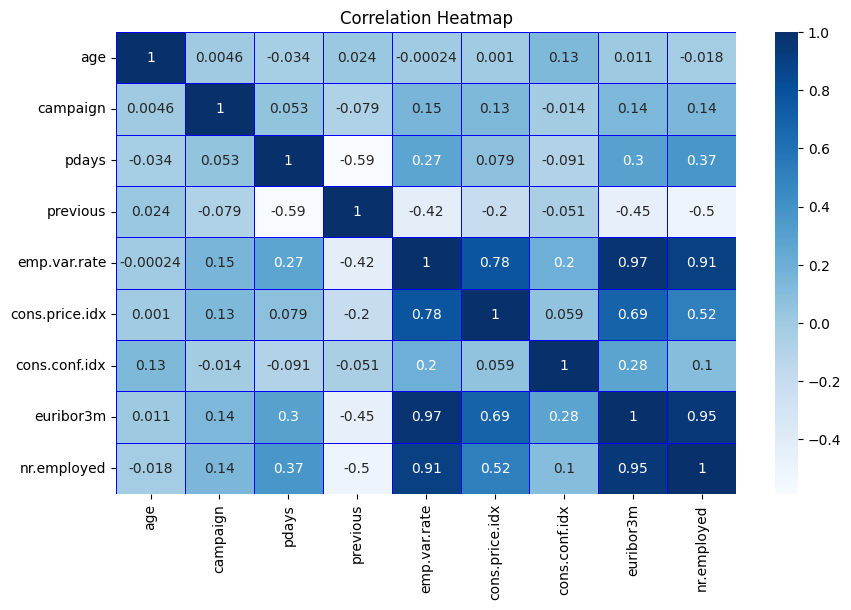

In [22]:
# heatmap

plt.figure(figsize=(10,6))
sns.heatmap(numerical_corr.corr(),annot=True,cmap='Blues',linecolor='blue',linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

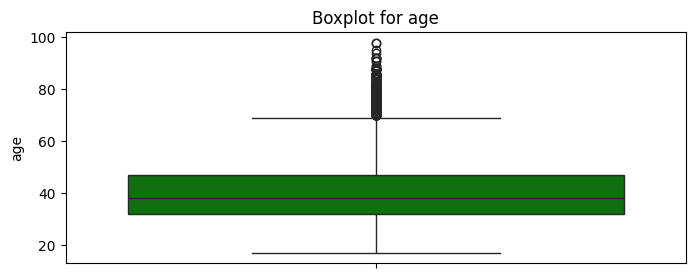

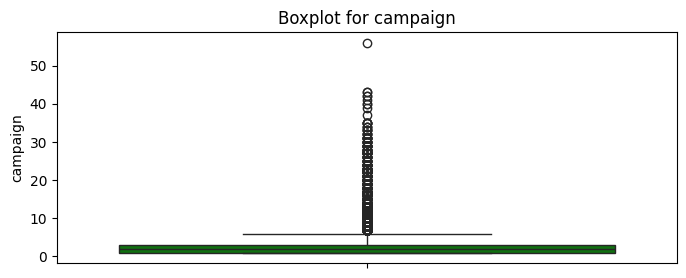

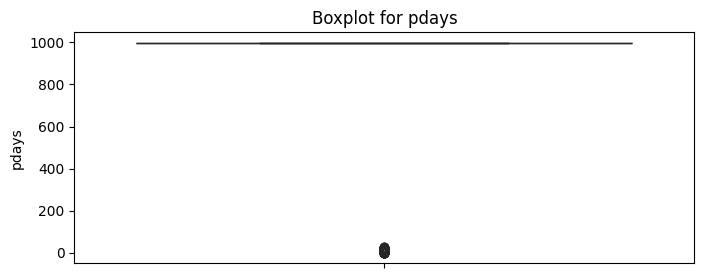

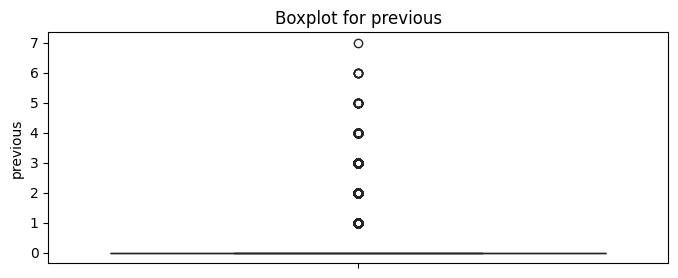

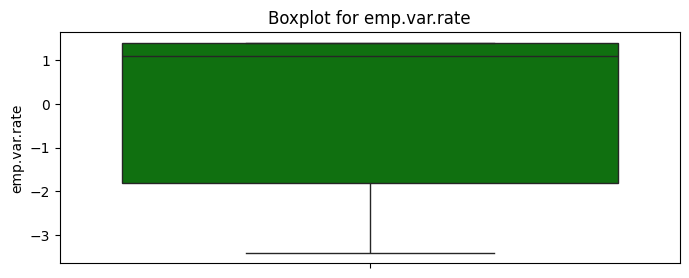

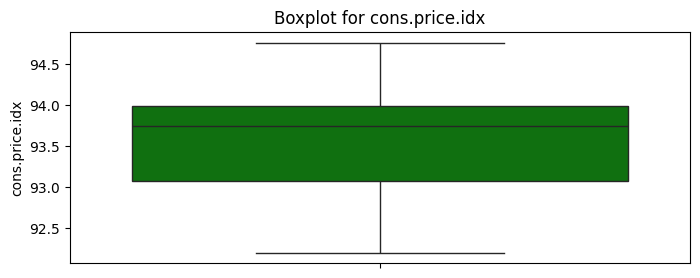

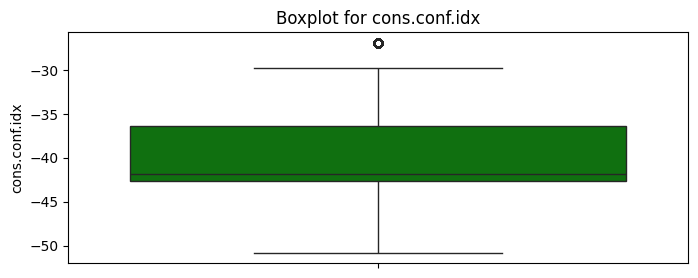

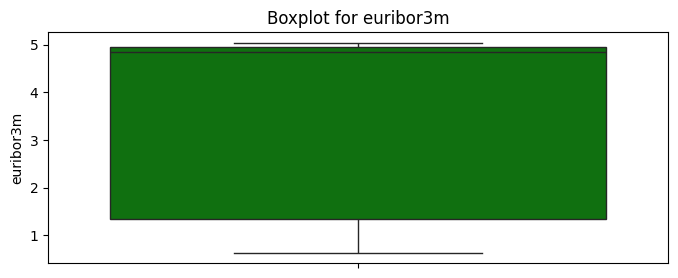

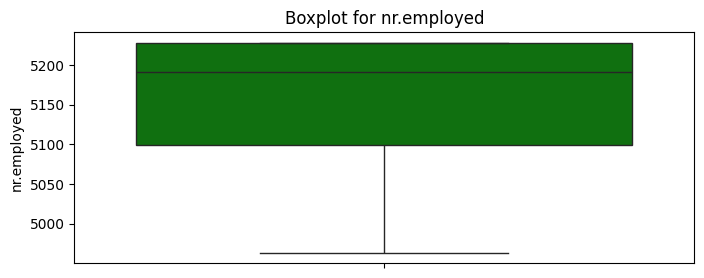

In [23]:
# BoxPlot

for col in numerical_features:
  plt.figure(figsize=(8,3))
  sns.boxplot(data[col],color='green')
  plt.title(f'Boxplot for {col}')
  plt.show()

## **Distribution of Categorical Features**

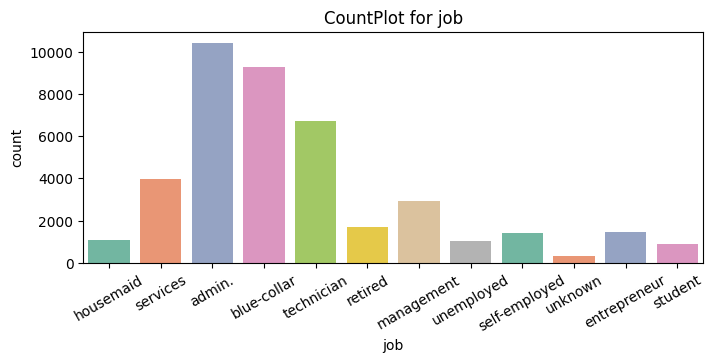

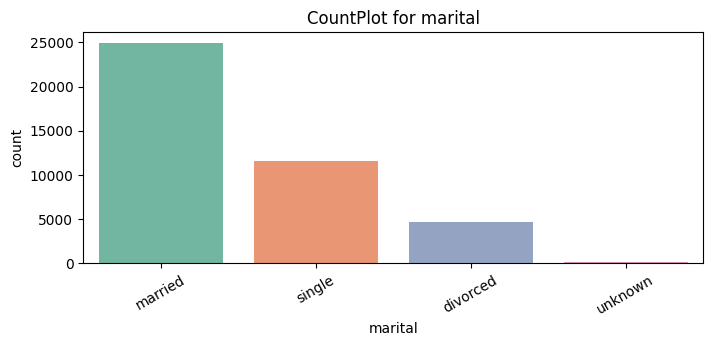

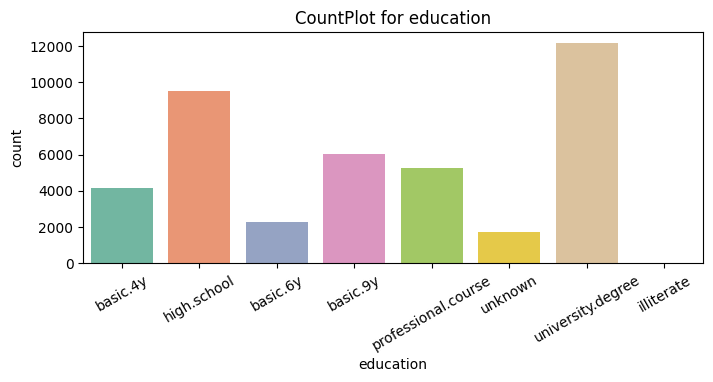

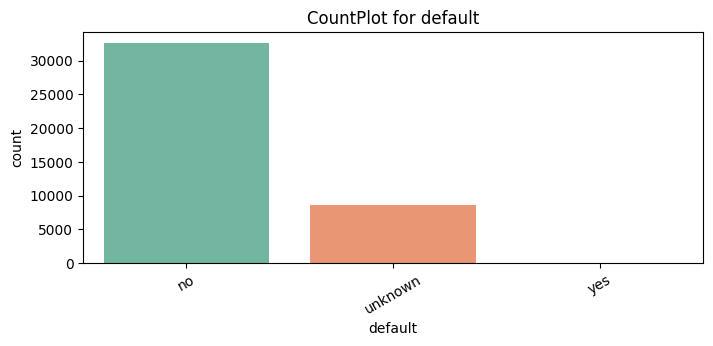

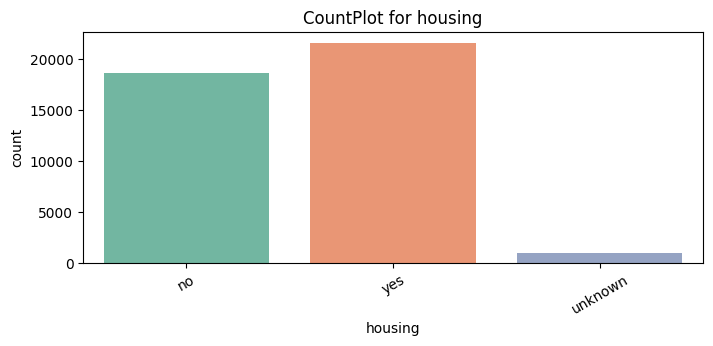

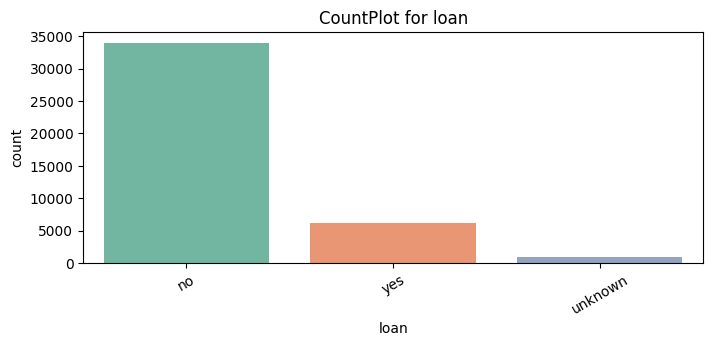

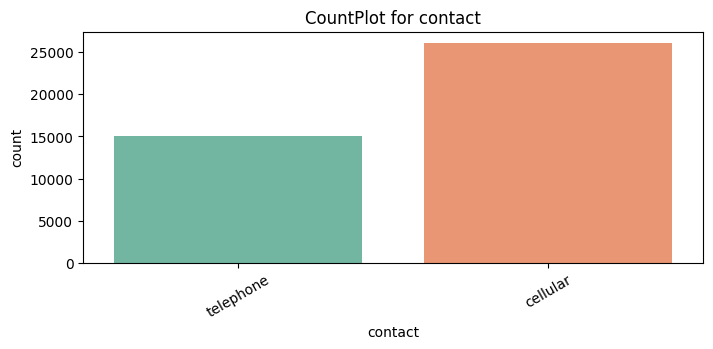

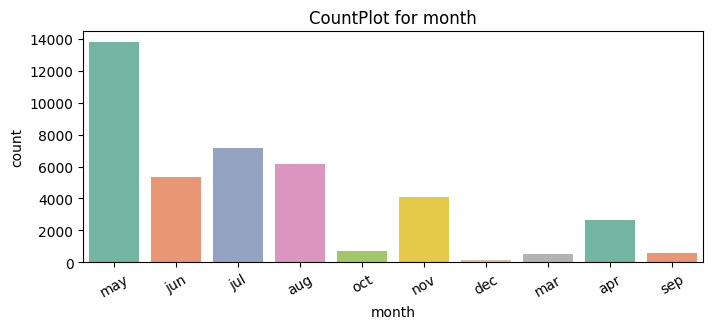

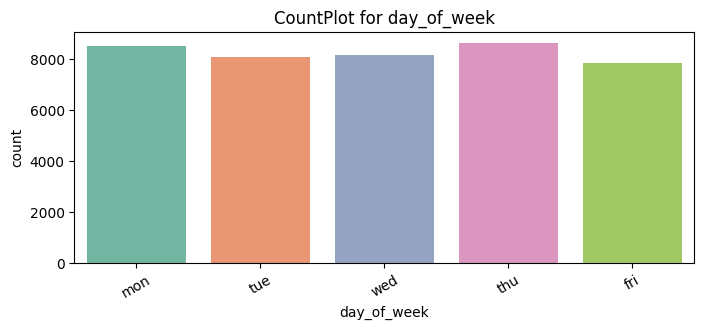

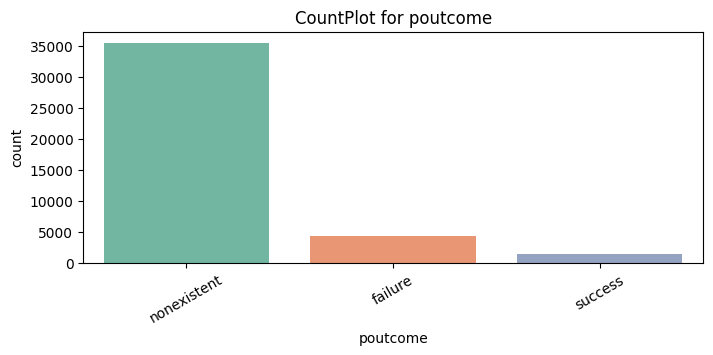

In [24]:
# Distribution of categorical features

categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_features:
  plt.figure(figsize=(8,3))
  sns.countplot(x=col,data=data,palette='Set2')
  plt.title(f'CountPlot for {col}')
  plt.xticks(rotation=30)
  plt.show()

 **Visualizing target feature**

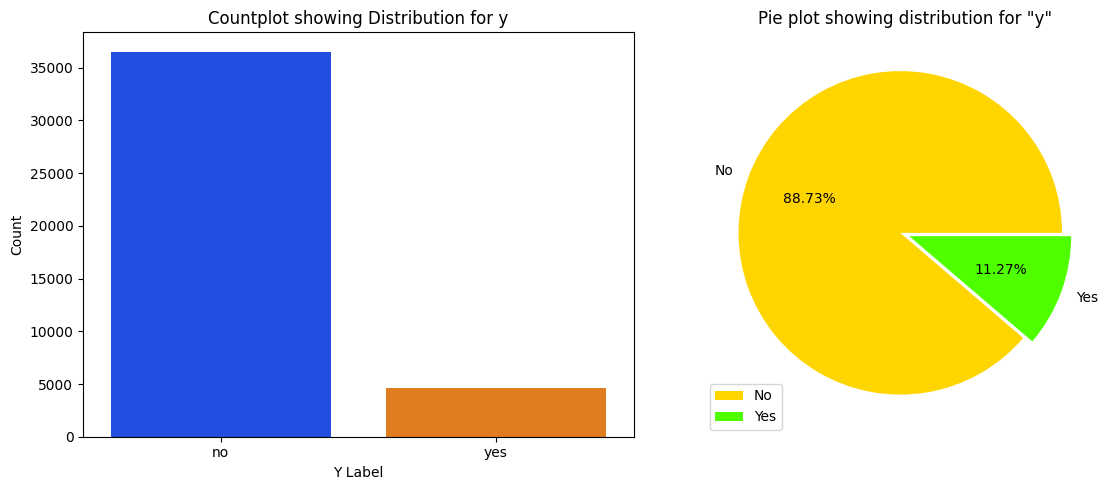

In [25]:
# Visualizing target feature

plt.figure(figsize=(12,5))

#count plot target feature
plt.subplot(1,2,1)
sns.countplot(x='y',data=data,palette='bright')
plt.title('Countplot showing Distribution for y')
plt.xlabel('Y Label')
plt.ylabel('Count')


# pie chart
plt.subplot(1,2,2)
color=sns.color_palette('hsv')
plt.pie(data['y'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%',colors=color,explode=[0.03,0.03])
plt.title('Pie plot showing distribution for "y"')
plt.legend(loc='lower left')

# Show the entire plot with both subplots
plt.tight_layout()
plt.show()


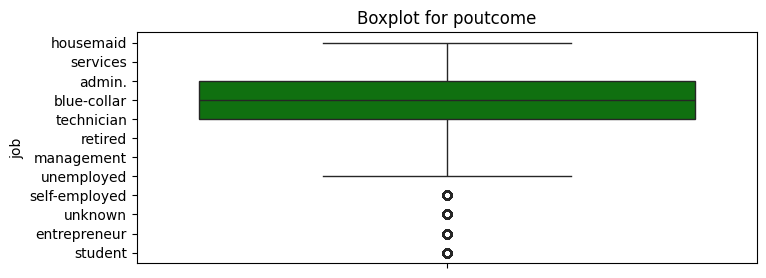

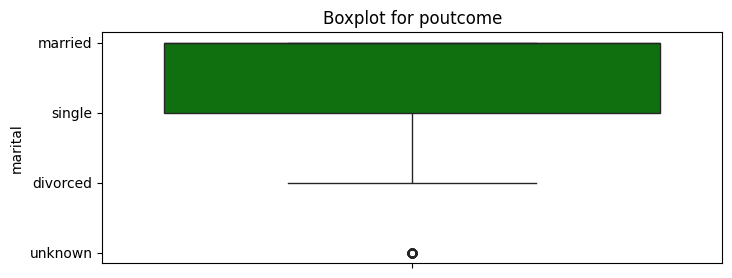

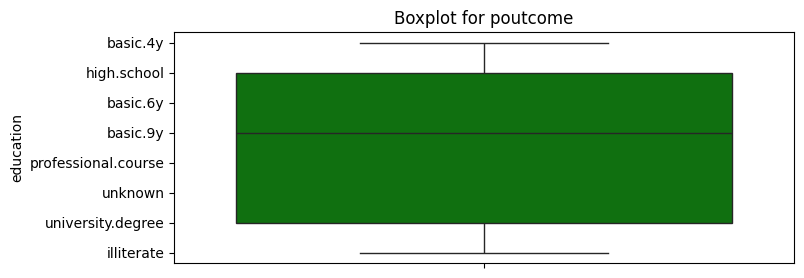

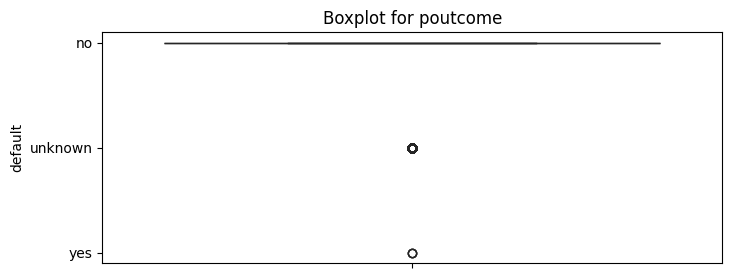

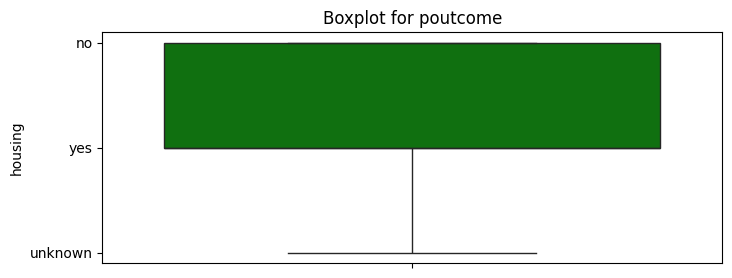

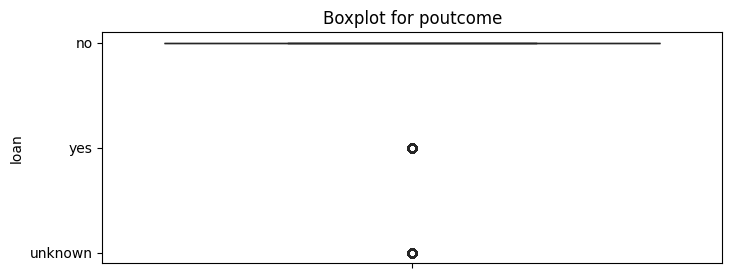

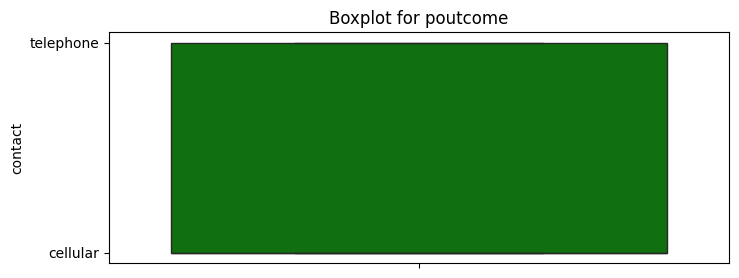

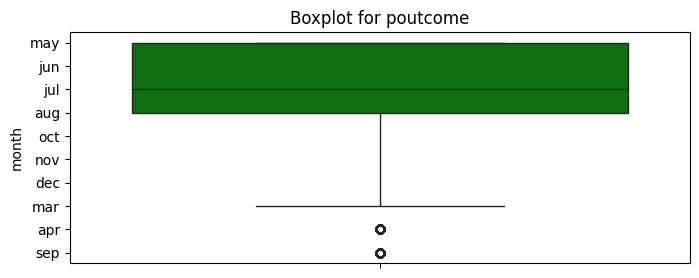

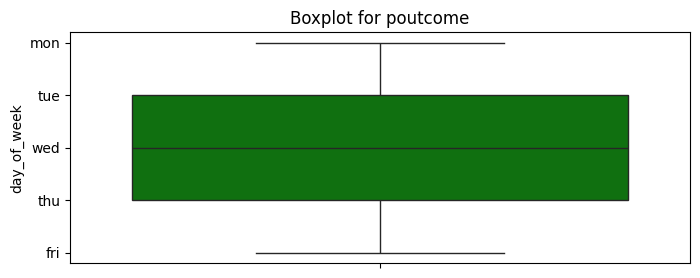

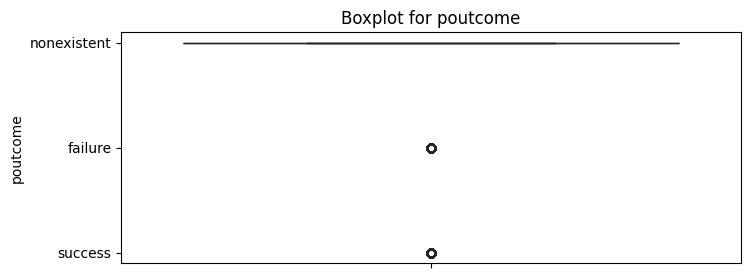

In [26]:
# Boxplot for Categorical Features

for i in categorical_features:
  plt.figure(figsize=(8,3))
  sns.boxplot(data[i],color='green')
  plt.title(f'Boxplot for {col}')
  plt.show()

# **Feature Engineering**

## **Encoding**

In [27]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
for col in categorical_features:
  data[col]=le.fit_transform(data[col])

In [29]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
# encoding for target feature

data['y']=le.fit_transform(data['y'])

In [31]:
# our label encoding is performed
# but many features are in different scales, so we have to reduce that scales and generalize the scales
# for that we are going to use standard scaler

## **Feature Scaling**

In [32]:
# Standardization
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [33]:
data.iloc[:,:-1]=st.fit_transform(data.iloc[:,:-1])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533143,-0.201475,-0.283703,-1.753753,-0.513657,-1.087787,-0.45257,1.318174,0.762504,-0.718775,...,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695,0
1,1.629107,0.911363,-0.283703,-0.349596,1.945111,-1.087787,-0.45257,1.318174,0.762504,-0.718775,...,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695,0
2,-0.290177,0.911363,-0.283703,-0.349596,-0.513657,0.942065,-0.45257,1.318174,0.762504,-0.718775,...,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695,0
3,-0.002284,-1.036103,-0.283703,-1.285700,-0.513657,-1.087787,-0.45257,1.318174,0.762504,-0.718775,...,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695,0
4,1.533143,0.911363,-0.283703,-0.349596,-0.513657,-1.087787,2.31104,1.318174,0.762504,-0.718775,...,-0.565963,0.195443,-0.349551,0.192651,0.648101,0.722628,0.886568,0.712463,0.331695,0


In [34]:
data.drop(['duration'],axis=1,inplace=True)

In [35]:
# Spliting in training and testing sets

x=data.iloc[:,:-1]
y=data.iloc[:,-1]

## **Feature Selection**

## **Recursive Feature Eliminator**

In [36]:
# selecting an important and requried feature for model building

In [37]:
from sklearn.feature_selection import RFE

# RFE using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
imp_dt=DecisionTreeClassifier(criterion='gini')
rfe_dt=RFE(estimator=imp_dt)
fit_dt=rfe_dt.fit(x,y)
print(f'Number of Important features : {fit_dt.n_features_}')
print(f'Support : {fit_dt.support_}')
print(f'Ranking : {fit_dt.ranking_}')

Number of Important features : 9
Support : [ True  True  True  True False  True False False False  True  True False
 False False False False False  True  True]
Ranking : [ 1  1  1  1  6  1  3 10  7  1  1  2  5  8 11  9  4  1  1]


In [38]:
# Dataframe showing important features when using rfe for decision tree

imp=pd.DataFrame({'Features':x.columns,
                  'Rankings':fit_dt.ranking_,
                  'Support':fit_dt.support_})
imp.sort_values(by='Rankings',ascending=True)

,Features,Rankings,Support
0,age,1,True
10,campaign,1,True
17,euribor3m,1,True
5,housing,1,True
9,day_of_week,1,True
3,education,1,True
2,marital,1,True
1,job,1,True
18,nr.employed,1,True
11,pdays,2,False


In [39]:
# RFE using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
imp_rf=RandomForestClassifier(criterion='entropy')
rfe_rf=RFE(estimator=imp_rf)
fit_rf=rfe_rf.fit(x,y)
print(fit_rf.n_features_)
print(fit_rf.support_)
print(fit_rf.ranking_)

9
[ True  True False  True False False False False False  True  True False
 False  True False False  True  True  True]
[ 1  1  3  1  9  2  7 11  8  1  1  5 10  1  4  6  1  1  1]


In [40]:
# Dataframe showing important features when using rfe for random forest

imp=pd.DataFrame({'Features':x.columns,
                  'Rankings':fit_rf.ranking_,
                  'Support':fit_rf.support_})
imp.sort_values(by='Rankings',ascending=True)

,Features,Rankings,Support
0,age,1,True
16,cons.conf.idx,1,True
13,poutcome,1,True
10,campaign,1,True
17,euribor3m,1,True
9,day_of_week,1,True
3,education,1,True
1,job,1,True
18,nr.employed,1,True
5,housing,2,False


In [41]:
# Features with rank 1, rank2 and rank3 are most important features, so consider that features for model building

## **final dataframe with important features**

In [42]:
final_data=data.drop(['previous','contact','default','cons.price.idx','month','loan','pdays','emp.var.rate'],axis=1)
final_data.head()

,age,job,marital,education,housing,day_of_week,campaign,poutcome,cons.conf.idx,euribor3m,nr.employed,y
0,1.533143,-0.201475,-0.283703,-1.753753,-1.087787,-0.718775,-0.565963,0.192651,0.886568,0.712463,0.331695,0
1,1.629107,0.911363,-0.283703,-0.349596,-1.087787,-0.718775,-0.565963,0.192651,0.886568,0.712463,0.331695,0
2,-0.290177,0.911363,-0.283703,-0.349596,0.942065,-0.718775,-0.565963,0.192651,0.886568,0.712463,0.331695,0
3,-0.002284,-1.036103,-0.283703,-1.285700,-1.087787,-0.718775,-0.565963,0.192651,0.886568,0.712463,0.331695,0
4,1.533143,0.911363,-0.283703,-0.349596,-1.087787,-0.718775,-0.565963,0.192651,0.886568,0.712463,0.331695,0


In [43]:
#spliting into independent and dependent features
x=final_data.iloc[:,:-1]  #independent
y=final_data.iloc[:,-1]   #dependent

# **Model Validation**

### **1.Train and Test Split**

In [44]:
#spliting into training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [45]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(28823, 11)
(12353, 11)
(28823,)
(12353,)


### **2. KFold Cross Validation Score**

In [46]:
#kfold cross-validation
from sklearn.model_selection import KFold,cross_val_score
k=KFold(n_splits=10,shuffle=True,random_state=25)

# **Model Building Methods**

# **1.Logistic Regression**

In [47]:
#LogisticRegression using train-test-split

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=400)                 #initialization
lr_model.fit(xtrain,ytrain)                               #fitting
ypred_lr=lr_model.predict(xtest)                             #prediction

#classification report
print('classification report:')
print(classification_report(ypred_lr,ytest))


classification report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     11909
           1       0.21      0.63      0.32       444

    accuracy                           0.90     12353
   macro avg       0.60      0.77      0.63     12353
weighted avg       0.96      0.90      0.92     12353



In [48]:
#Accuracy score
score1=np.round(accuracy_score(ytest,ypred_lr),2)
train1=np.round(lr_model.score(xtrain,ytrain),2)
precision1=np.round(precision_score(ytest,ypred_lr),2)
recall1=np.round(recall_score(ytest,ypred_lr),2)
f1_score1=np.round(f1_score(ytest,ypred_lr),2)
y_probs1 = lr_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc1 = np.round(roc_auc_score(ytest, y_probs1),4)
print(f'Testing Accuracy Score:{score1}')
print(f'Training Accuracy Score:{train1}')
print(f'Precision Score:{precision1}')
print(f'Recall Score:{recall1}')
print(f'F1 Score:{f1_score1}')
print(f"ROC AUC Score:{roc_auc1}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.89
Precision Score:0.63
Recall Score:0.21
F1 Score:0.32
ROC AUC Score:0.7526


In [49]:
#logistic regression using cross validation

lr_model=LogisticRegression(max_iter=400)
lr_result=cross_val_score(lr_model,x,y,cv=k)        #cross-validation-score
lr_accuracy=np.round(lr_result.mean(),2)
print(f'Cross_Val Score:{lr_accuracy}')

Cross_Val Score:0.9


# **2.DecisionTree Classifier**

In [50]:
#decisionTreeclassifier using train-test-split

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)       #initialization
dt_model.fit(xtrain,ytrain)                                            #fitting
ypred_dt=dt_model.predict(xtest)                                       #prediction

#classification report
print(f"""classification report:
{classification_report(ytest,ypred_dt)}""")

classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11025
           1       0.71      0.18      0.29      1328

    accuracy                           0.90     12353
   macro avg       0.81      0.59      0.62     12353
weighted avg       0.89      0.90      0.88     12353



In [51]:
#Accuracy Score
score2=np.round(accuracy_score(ypred_dt,ytest),2)
train2=np.round(dt_model.score(xtrain,ytrain),2)
precision2=np.round(precision_score(ytest,ypred_dt),2)
recall2=np.round(recall_score(ytest,ypred_dt),2)
f1_score2=np.round(f1_score(ytest,ypred_dt),2)
y_probs2= dt_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc2 = np.round(roc_auc_score(ytest, y_probs2),4)
print(f'Testing Accuracy Score:{score2}')
print(f'Training Accuracy Score:{train2}')
print(f'Precision Score:{precision2}')
print(f'Recall Score:{recall2}')
print(f'F1 Score:{f1_score2}')
print(f"ROC AUC Score:{roc_auc2}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.9
Precision Score:0.71
Recall Score:0.18
F1 Score:0.29
ROC AUC Score:0.7628


In [52]:
#decisiontreeclassifier using cross validation
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
k=KFold(n_splits=10,shuffle=True,random_state=25)
dt_result=cross_val_score(dt_model,x,y,cv=k)
dt_accuracy=np.round(dt_result.mean(),2)
print(f'Cross_Val Score:{dt_accuracy}')

Cross_Val Score:0.9


# **3.KNN Classifier**

In [53]:
#knn classifier using train-test-split

from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=15)         #initialization
knn_model.fit(xtrain,ytrain)                           #fitting
ypred_knn=knn_model.predict(xtest)                     #prediction
#classification report
print(f'''classification report:
{classification_report(ytest,ypred_knn)}''')

classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11025
           1       0.57      0.23      0.33      1328

    accuracy                           0.90     12353
   macro avg       0.74      0.60      0.64     12353
weighted avg       0.88      0.90      0.88     12353



In [54]:
#Accuracy Score
score3=np.round(accuracy_score(ytest,ypred_knn),2)
train3=np.round(knn_model.score(xtrain,ytrain),2)
precision3=np.round(precision_score(ytest,ypred_knn),2)
recall3=np.round(recall_score(ytest,ypred_knn),2)
f1_score3=np.round(f1_score(ytest,ypred_knn),2)
y_probs3= knn_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc3 = np.round(roc_auc_score(ytest, y_probs3),4)
print(f'Testing Accuracy Score:{score3}')
print(f'Training Accuracy Score:{train3}')
print(f'Precision Score:{precision3}')
print(f'Recall Score:{recall3}')
print(f'F1 Score:{f1_score3}')
print(f"ROC AUC Score:{roc_auc3}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.9
Precision Score:0.57
Recall Score:0.23
F1 Score:0.33
ROC AUC Score:0.7332


In [55]:
#KNN classifier using cross-validation
knn_model=KNeighborsClassifier(n_neighbors=11)
k=KFold(n_splits=10,shuffle=True,random_state=15)
knn_result=cross_val_score(knn_model,x,y,cv=k)
knn_accuracy=np.round(knn_result.mean(),2)
print(f'Cross Val Score:{knn_accuracy}')

Cross Val Score:0.89


# **4.SVM Classifier**

In [56]:
#svm classification for train-test-split

from sklearn.svm import SVC
svm_model=SVC(random_state=42,probability=True)     #initialization
svm_model.fit(xtrain,ytrain)                        #fitting
ypred_svm=svm_model.predict(xtest)                  #prediction

#classification report
print(f'''classification report:
{classification_report(ytest,ypred_svm)}''')

classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11025
           1       0.70      0.19      0.29      1328

    accuracy                           0.90     12353
   macro avg       0.80      0.59      0.62     12353
weighted avg       0.89      0.90      0.88     12353



In [57]:
#Accuracy Score
score4=np.round(accuracy_score(ytest,ypred_svm),2)
train4=np.round(svm_model.score(xtrain,ytrain),2)
precision4=np.round(precision_score(ytest,ypred_svm),2)
recall4=np.round(recall_score(ytest,ypred_svm),2)
f1_score4=np.round(f1_score(ytest,ypred_svm),2)
y_probs4= svm_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc4 = np.round(roc_auc_score(ytest, y_probs4),4)
print(f'Testing Accuracy Score:{score4}')
print(f'Training Accuracy Score:{train4}')
print(f'Precision Score:{precision4}')
print(f'Recall Score:{recall4}')
print(f'F1 Score:{f1_score4}')
print(f"ROC AUC Score:{roc_auc4}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.9
Precision Score:0.7
Recall Score:0.19
F1 Score:0.29
ROC AUC Score:0.6765


In [58]:
#svm classification using cross validation

svm_model=SVC(kernel='linear',C=1)
svm_result=cross_val_score(svm_model,x,y,cv=k)
svm_accuracy=np.round(svm_result.mean(),2)
print(f'Accuracy:{svm_accuracy}')

Accuracy:0.89


# **5.Naive Bayes**

In [59]:
#naive bayes using train-test-split

from sklearn.naive_bayes import BernoulliNB
nb_model=BernoulliNB()                           #initialization
nb_model.fit(xtrain,ytrain)                       #fitting
ypred_nb=nb_model.predict(xtest)                  #prediction

#classification report
print(f'''classification report:
{classification_report(ytest,ypred_nb)}''')


classification report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     11025
           1       0.33      0.35      0.34      1328

    accuracy                           0.85     12353
   macro avg       0.63      0.63      0.63     12353
weighted avg       0.86      0.85      0.86     12353



In [60]:
#Accuracy Score
score5=np.round(accuracy_score(ytest,ypred_nb),2)
train5=np.round(nb_model.score(xtrain,ytrain),2)
precision5=np.round(precision_score(ytest,ypred_nb),2)
recall5=np.round(recall_score(ytest,ypred_nb),2)
f1_score5=np.round(f1_score(ytest,ypred_nb),2)
y_probs5= nb_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc5 = np.round(roc_auc_score(ytest, y_probs5),4)
print(f'Testing Accuracy Score:{score5}')
print(f'Training Accuracy Score:{train5}')
print(f'Precision Score:{precision5}')
print(f'Recall Score:{recall5}')
print(f'F1 Score:{f1_score5}')
print(f"ROC AUC Score:{roc_auc5}")

Testing Accuracy Score:0.85
Training Accuracy Score:0.85
Precision Score:0.33
Recall Score:0.35
F1 Score:0.34
ROC AUC Score:0.7366


In [61]:
#naivebayes classification using cross-validation

nb_model=BernoulliNB()
nb_result=cross_val_score(nb_model,x,y,cv=k)
naive_accuracy=np.round(nb_result.mean(),2)
print(f'Accuracy:{naive_accuracy}')

Accuracy:0.86


# **6.Random Forest**

In [62]:
# RandomForest with train-test-split

from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features=3,max_depth=3,random_state=35) #initialization
rfc_model.fit(xtrain,ytrain)  #fitting
ypred_rfc=rfc_model.predict(xtest)  #prediction

# classification report
print(f'''classification report:
{classification_report(ytest,ypred_rfc)}''')

classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11025
           1       0.72      0.18      0.28      1328

    accuracy                           0.90     12353
   macro avg       0.81      0.58      0.62     12353
weighted avg       0.89      0.90      0.88     12353



In [63]:
#Accuracy Score
score6=np.round(accuracy_score(ytest,ypred_rfc),2)
train6=np.round(rfc_model.score(xtrain,ytrain),2)
precision6=np.round(precision_score(ytest,ypred_rfc),2)
recall6=np.round(recall_score(ytest,ypred_rfc),2)
f1_score6=np.round(f1_score(ytest,ypred_rfc),2)
y_probs6= rfc_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc6 = np.round(roc_auc_score(ytest, y_probs6),4)
print(f'Testing Accuracy Score:{score6}')
print(f'Training Accuracy Score:{train6}')
print(f'Precision Score:{precision6}')
print(f'Recall Score:{recall6}')
print(f'F1 Score:{f1_score6}')
print(f"ROC AUC Score: {roc_auc6}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.9
Precision Score:0.72
Recall Score:0.18
F1 Score:0.28
ROC AUC Score: 0.7754


In [64]:
#randomforestclassifier using cross-validation

rfc_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features=3,max_depth=3,random_state=35)
rfc_result=cross_val_score(rfc_model,x,y,cv=k)
rfc_accuracy=np.round(rfc_result.mean(),2)
print(f"Accuracy:{rfc_accuracy}")

Accuracy:0.9


# **7.Bagging Classifier**

In [65]:
# Bagging Classifier with train-test-split

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(max_iter=400)
bag_model=BaggingClassifier(base_estimator=lg,n_estimators=50,random_state=20)    #initialization
bag_model.fit(xtrain,ytrain)                                                      #fitting
ypred_bag=bag_model.predict(xtest)                                                #prediction


# classification report
print(f'''classification report:
{classification_report(ytest,ypred_bag)}''')

classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11025
           1       0.63      0.21      0.31      1328

    accuracy                           0.90     12353
   macro avg       0.77      0.60      0.63     12353
weighted avg       0.88      0.90      0.88     12353



In [66]:
#Accuracy Score
score7=np.round(accuracy_score(ytest,ypred_bag),2)
train7=np.round(bag_model.score(xtrain,ytrain),2)
precision7=np.round(precision_score(ytest,ypred_bag),2)
recall7=np.round(recall_score(ytest,ypred_bag),2)
f1_score7=np.round(f1_score(ytest,ypred_bag),2)
y_probs7= bag_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc7 = np.round(roc_auc_score(ytest, y_probs7),4)
print(f'Testing Accuracy Score:{score7}')
print(f'Training Accuracy Score:{train7}')
print(f'Precision Score:{precision7}')
print(f'Recall Score:{recall7}')
print(f'F1 Score:{f1_score7}')
print(f"ROC AUC Score:{roc_auc7}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.89
Precision Score:0.63
Recall Score:0.21
F1 Score:0.31
ROC AUC Score:0.7524


In [67]:
#baggingclassifier using cross-validation

bag_model=BaggingClassifier(base_estimator=lg,n_estimators=50,random_state=20)
bag_result=cross_val_score(bag_model,x,y,cv=k)
bag_accuracy=np.round(bag_result.mean(),2)
print(f"Accuracy:{bag_accuracy}")

Accuracy:0.9


# **8.AdaBoost Classifier**

In [68]:
# AdaBoost Classifier with train-test-split

from sklearn.ensemble import AdaBoostClassifier
ad_model=AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=35) #initialization
ad_model.fit(xtrain,ytrain)  #fitting
ypred_ad=ad_model.predict(xtest)  #prediction

# classification report
print(f'''classification report:
{classification_report(ytest,ypred_ad)}''')


classification report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11025
           1       0.70      0.19      0.30      1328

    accuracy                           0.90     12353
   macro avg       0.80      0.59      0.63     12353
weighted avg       0.89      0.90      0.88     12353



In [69]:
#Accuracy Score
score8=np.round(accuracy_score(ytest,ypred_ad),2)
train8=np.round(ad_model.score(xtrain,ytrain),2)
precision8=np.round(precision_score(ytest,ypred_ad),2)
recall8=np.round(recall_score(ytest,ypred_ad),2)
f1_score8=np.round(f1_score(ytest,ypred_ad),2)
y_probs8= ad_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc8 = np.round(roc_auc_score(ytest, y_probs8),4)
print(f'Testing Accuracy Score:{score8}')
print(f'Training Accuracy Score:{train8}')
print(f'Precision Score:{precision8}')
print(f'Recall Score:{recall8}')
print(f'F1 Score:{f1_score8}')
print(f"ROC AUC Score:{roc_auc8}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.9
Precision Score:0.7
Recall Score:0.19
F1 Score:0.3
ROC AUC Score:0.7733


In [70]:
# AdaBoost Classifier using cross-validation

ad_model=AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=35)
ad_result=cross_val_score(ad_model,x,y,cv=k)
ad_accuracy=np.round(ad_result.mean(),2)
print(f"Accuracy:{ad_accuracy}")

Accuracy:0.9


# **9.GradientBoosting Classifier**

In [71]:
# GradientBoosting Classifier with train-test-split

from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3,random_state=35) #initialization
gb_model.fit(xtrain,ytrain)  #fitting
ypred_gb=gb_model.predict(xtest)  #prediction

# classification report
print(f'''classification report:
{classification_report(ytest,ypred_gb)}''')

classification report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11025
           1       0.64      0.23      0.34      1328

    accuracy                           0.90     12353
   macro avg       0.77      0.61      0.64     12353
weighted avg       0.88      0.90      0.88     12353



In [72]:
#Accuracy Score
score9=np.round(accuracy_score(ytest,ypred_gb),2)
train9=np.round(gb_model.score(xtrain,ytrain),2)
precision9=np.round(precision_score(ytest,ypred_gb),2)
recall9=np.round(recall_score(ytest,ypred_gb),2)
f1_score9=np.round(f1_score(ytest,ypred_gb),2)
y_probs9= gb_model.predict_proba(xtest)[:, 1]       #probabilites for positive class (class1)
# Calculating the ROC AUC score
roc_auc9 = np.round(roc_auc_score(ytest, y_probs9),4)
print(f'Testing Accuracy Score:{score9}')
print(f'Training Accuracy Score:{train9}')
print(f'Precision Score:{precision9}')
print(f'Recall Score:{recall9}')
print(f'F1 Score:{f1_score9}')
print(f"ROC AUC Score: {roc_auc9}")

Testing Accuracy Score:0.9
Training Accuracy Score:0.9
Precision Score:0.64
Recall Score:0.23
F1 Score:0.34
ROC AUC Score: 0.7935


In [73]:
# GradientBoosting Classifier using cross-validation

gb_model=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,max_depth=3,random_state=35)
gb_result=cross_val_score(gb_model,x,y,cv=k)
gb_accuracy=np.round(gb_result.mean(),2)
print(f"Accuracy:{gb_accuracy}")

Accuracy:0.9


### **dataframe showing all models with train-test-model scores and cross-validation model scores**

In [74]:
val={'Models':pd.Series(['Logistic Regression','Decision Tree','K-Nearest Neighbor','SVM Classifier','Naive Bayes','Random Forest',
                         'Bagging Classifier','AdaBoost Classifier','GradientBoosting']),
     'Score(Testing Accuracy)':pd.Series([score1,score2,score3,score4,score5,score6,score7,score8,score9]),
     'Score(Training Accuracy)':pd.Series([train1,train2,train3,train4,train5,train6,train7,train8,train9]),
     'Precision':pd.Series([precision1,precision2,precision3,precision4,precision5,precision6,precision7,precision8,precision9]),
     'Recall':pd.Series([recall1,recall2,recall3,recall4,recall5,recall6,recall7,recall8,recall9]),
     'F1-Score':pd.Series([f1_score1,f1_score2,f1_score3,f1_score4,f1_score5,f1_score6,f1_score7,f1_score8,f1_score9]),
     'ROC_AUC_Score':pd.Series([roc_auc1,roc_auc2,roc_auc3,roc_auc4,roc_auc5,roc_auc6,roc_auc7,roc_auc8,roc_auc9]),
     'Cross_Val_Score':pd.Series([lr_accuracy,dt_accuracy,knn_accuracy,svm_accuracy,naive_accuracy,rfc_accuracy,bag_accuracy,ad_accuracy,gb_accuracy])}

score=pd.DataFrame(val)
score

,Models,Score(Testing Accuracy),Score(Training Accuracy),Precision,Recall,F1-Score,ROC_AUC_Score,Cross_Val_Score
0,Logistic Regression,0.90,0.89,0.63,0.21,0.32,0.7526,0.90
1,Decision Tree,0.90,0.90,0.71,0.18,0.29,0.7628,0.90
2,K-Nearest Neighbor,0.90,0.90,0.57,0.23,0.33,0.7332,0.89
3,SVM Classifier,0.90,0.90,0.70,0.19,0.29,0.6765,0.89
4,Naive Bayes,0.85,0.85,0.33,0.35,0.34,0.7366,0.86
5,Random Forest,0.90,0.90,0.72,0.18,0.28,0.7754,0.90
6,Bagging Classifier,0.90,0.89,0.63,0.21,0.31,0.7524,0.90
7,AdaBoost Classifier,0.90,0.90,0.70,0.19,0.30,0.7733,0.90
8,GradientBoosting,0.90,0.90,0.64,0.23,0.34,0.7935,0.90


In [75]:
# If we Compare all the models "RandomForest" and "GradientBoosting" has good scores

## **Hyperparameter Tuning**

In [76]:
# Hyperparameter Tuning on Both the Models
# RandomForest
# GradientBoosting

In [77]:
df = pd.read_csv('Full-DataSet.csv', sep=';')

feature_columns = ['age', 'job', 'marital', 'education', 'housing', 'day_of_week',
                   'campaign', 'pdays', 'poutcome', 'emp.var.rate',
                   'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
X = df[feature_columns]
y = df['y']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)


In [78]:
# Spliting in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [79]:
# Hyperparameter tuning for Random Forest (reduced grid)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=3, scoring='f1')
rf_grid_search.fit(X_train_res, y_train_res)
best_rf = rf_grid_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting (reduced grid)
gb_param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid, cv=3, scoring='f1')
gb_grid_search.fit(X_train_res, y_train_res)
best_gb = gb_grid_search.best_estimator_

rf_y_pred = best_rf.predict(X_test)
gb_y_pred = best_gb.predict(X_test)

In [80]:
# Print classification reports and F1-scores
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Random Forest F1-Score:", f1_score(y_test, rf_y_pred, average='weighted'))

print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_y_pred))
print("Gradient Boosting F1-Score:", f1_score(y_test, gb_y_pred, average='weighted'))

Random Forest Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.91      0.92      7303
         yes       0.42      0.54      0.48       935

    accuracy                           0.86      8238
   macro avg       0.68      0.72      0.70      8238
weighted avg       0.88      0.86      0.87      8238

Random Forest F1-Score: 0.8715249355555252

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.92      0.92      7303
         yes       0.43      0.49      0.46       935

    accuracy                           0.87      8238
   macro avg       0.68      0.70      0.69      8238
weighted avg       0.88      0.87      0.87      8238

Gradient Boosting F1-Score: 0.871877209280456


In [81]:
# You can also compare cross-validation scores using StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation for both models
rf_cv_scores = []
gb_cv_scores = []

for train_idx, test_idx in skf.split(X, y):
    X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

    # Resample the training data for cross-validation
    X_train_cv_res, y_train_cv_res = sm.fit_resample(X_train_cv, y_train_cv)

    best_rf.fit(X_train_cv_res, y_train_cv_res)
    rf_cv_scores.append(f1_score(y_test_cv, best_rf.predict(X_test_cv), average='weighted'))

    best_gb.fit(X_train_cv_res, y_train_cv_res)
    gb_cv_scores.append(f1_score(y_test_cv, best_gb.predict(X_test_cv), average='weighted'))

print("\nRandom Forest Cross-Validation F1-Scores:", rf_cv_scores)
print("Average RF CV F1-Score:", np.mean(rf_cv_scores))

print("\nGradient Boosting Cross-Validation F1-Scores:", gb_cv_scores)
print("Average GB CV F1-Score:", np.mean(gb_cv_scores))



Random Forest Cross-Validation F1-Scores: [0.8711638910332049, 0.8751266479907176, 0.8756516755124248]
Average RF CV F1-Score: 0.8739807381787825

Gradient Boosting Cross-Validation F1-Scores: [0.8722753932091657, 0.8765795463643979, 0.881513612707159]
Average GB CV F1-Score: 0.8767895174269075


In [82]:
# Final Model : Gradient Boosting

## **Best Model: Gradient Boosting**

**Why it's the best: The Gradient Boosting model has the highest ROC AUC score (0.7935) and F1-Score (0.8767), indicating it has the best balance between sensitivity and specificity for this classification problem.**

**Inference:**

**1. The best model based on ROC AUC score provides the most reliable predictions for whether a client will subscribe to a term deposit.**

**2. A higher ROC AUC score indicates that the model has a better ability to distinguish between clients who will subscribe and those who will not.**

**3. Including deep learning allows us to test more complex models to potentially improve performance.**